# Trabalho de Dinâmica - Robô SCARA
### * Considerando a modelagem abaixo.

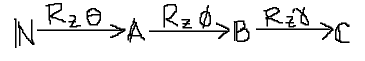

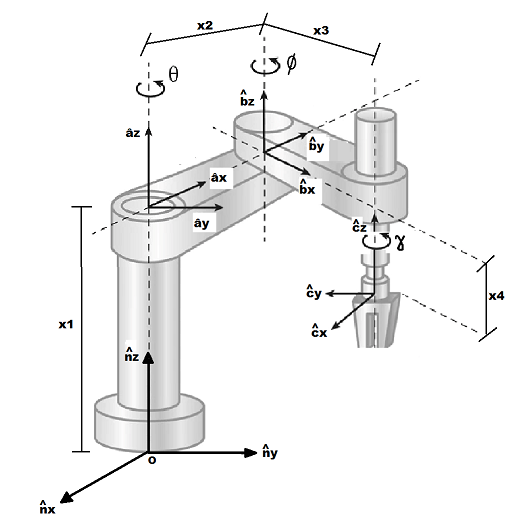

##### Importando as bibliotecas necessárias:

In [1]:
import sympy as sy
import sympy.physics.mechanics as ps

##### Referencial inercial:

In [2]:
N = ps.ReferenceFrame('N')

##### Variáveis dinâmicas:

In [3]:
theta,phi,gamma = ps.dynamicsymbols('theta phi gamma')

##### Referenciais móveis:

In [4]:
A = N.orientnew('A','Axis',[theta,N.z])
B = A.orientnew('B','Axis',[phi,A.z])
C = B.orientnew('C','Axis',[gamma,B.z])

#####  Variáveis das distâncias entre as origens dos sistemas referenciais:

In [5]:
x1,x2,x3 = sy.symbols('x1 x2 x3')
x4 = ps.dynamicsymbols('x4')

## Cinemática

##### Velocidades e acelerações angulares dos referenciais:

In [6]:
A.ang_vel_in(N)

theta'*N.z

In [7]:
A.ang_acc_in(N)

theta''*N.z

In [8]:
B.ang_vel_in(N)

theta'*N.z + phi'*A.z

In [9]:
B.ang_acc_in(N)

theta''*N.z + phi''*A.z

In [10]:
C.ang_vel_in(N)

theta'*N.z + phi'*A.z + gamma'*B.z

In [11]:
C.ang_acc_in(N)

theta''*N.z + phi''*A.z + gamma''*B.z

### Adotando as seguintes configurações:

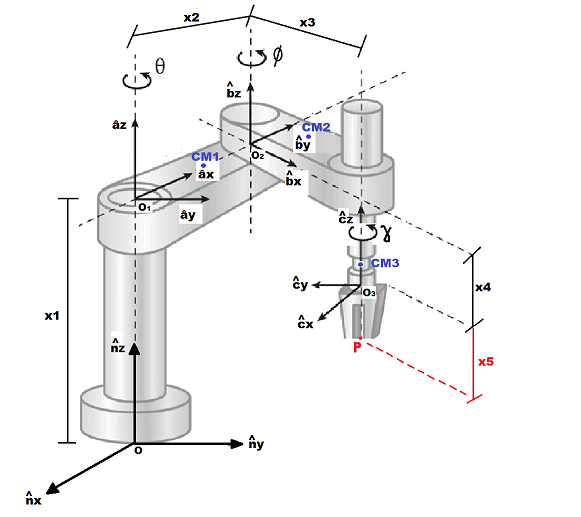

##### Ponto "O" com velocidade zero em relação ao referencial inercial:

In [12]:
O = ps.Point('O')
O.set_vel(N,0)

##### Distância entre O₃ e P:

In [13]:
x5 = sy.symbols('x5')

##### Ponto P e sua posição em relação ao referencial N:

In [14]:
P = ps.Point('P')
P.set_pos(O,(x1*N.z+x2*A.x+x3*B.x+x4*-C.z+x5*-C.z))
P.pos_from(O)

x1*N.z + x2*A.x + x3*B.x + (-x5 - x4)*C.z

##### Velocidade absoluta do ponto P em relação ao referencial N:

In [15]:
P.pos_from(O).dt(N)

x2*theta'*A.y + x3*(phi' + theta')*B.y - x4'*C.z

##### Definindo como velocidade do ponto P e imprimindo a aceleração do ponto:

In [16]:
P.set_vel(N,P.pos_from(O).dt(N))
P.acc(N)

- x2*theta'**2*A.x + x2*theta''*A.y - x3*(phi' + theta')**2*B.x + x3*(phi'' + theta'')*B.y - x4''*C.z

##### Ponto O₁, sua posição e aceleração:

In [17]:
O1 = ps.Point('O_1')
O1.set_pos(O,x1*N.z)
O1.pos_from(O).dt
O1.set_vel(N,O1.pos_from(O).dt(N))
O1.acc(N)

0

##### Ponto O₂, sua posição e aceleração:

In [18]:
O2 = ps.Point('O_2')
O2.set_pos(O,x1*N.z+x2*A.x)
O2.pos_from(O).dt
O2.set_vel(N,O2.pos_from(O).dt(N))
O2.acc(N)

- x2*theta'**2*A.x + x2*theta''*A.y

##### Ponto O₃, sua posição e aceleração:

In [19]:
O3 = ps.Point('O_3')
O3.set_pos(O,x1*N.z+x2*A.x+x3*B.x+x4*-C.z)
O3.pos_from(O).dt
O3.set_vel(N,O3.pos_from(O).dt(N))
O3.acc(N)

- x2*theta'**2*A.x + x2*theta''*A.y - x3*(phi' + theta')**2*B.x + x3*(phi'' + theta'')*B.y - x4''*C.z

##### Pontos dos centros de massa:

In [20]:
CM1 = ps.Point('CM1')
CM2 = ps.Point('CM2')
CM3 = ps.Point('CM3')

##### Posições dos centros de massa:

In [21]:
CM1.set_pos(O,(x1*N.z+x2/2*A.x))
CM2.set_pos(O,(x1*N.z+x2*A.x+x3/2*B.x))
CM3.set_pos(O,(x1*N.z+x2*A.x+x3*B.x+x4/2*-C.z))

##### Velocidade absoluta  do centro de massa 1:

In [22]:
CM1.pos_from(O).dt(N)

x2*theta'/2*A.y

##### Velocidade absoluta do centro de massa 2:

In [23]:
CM2.pos_from(O).dt(N)

x2*theta'*A.y + x3*(phi' + theta')/2*B.y

##### Velocidade absoluta do centro de massa 3:

In [24]:
CM3.pos_from(O).dt(N)

x2*theta'*A.y + x3*(phi' + theta')*B.y - x4'/2*C.z

##### Declarando estas velocidades como sendo as dos pontos CM1, CM2 e CM3:

In [25]:
CM1.set_vel(N,CM1.pos_from(O).dt(N))
CM2.set_vel(N,CM2.pos_from(O).dt(N))
CM3.set_vel(N,CM3.pos_from(O).dt(N))

##### Aceleração do centro de massa 1:

In [26]:
CM1.acc(N)

- x2*theta'**2/2*A.x + x2*theta''/2*A.y

##### Aceleração do centro de massa 2:

In [27]:
CM2.acc(N)

- x2*theta'**2*A.x + x2*theta''*A.y - x3*(phi' + theta')**2/2*B.x + x3*(phi'' + theta'')/2*B.y

##### Aceleração do centro de massa 3:

In [28]:
CM3.acc(N)

- x2*theta'**2*A.x + x2*theta''*A.y - x3*(phi' + theta')**2*B.x + x3*(phi'' + theta'')*B.y - x4''/2*C.z

## Cinética

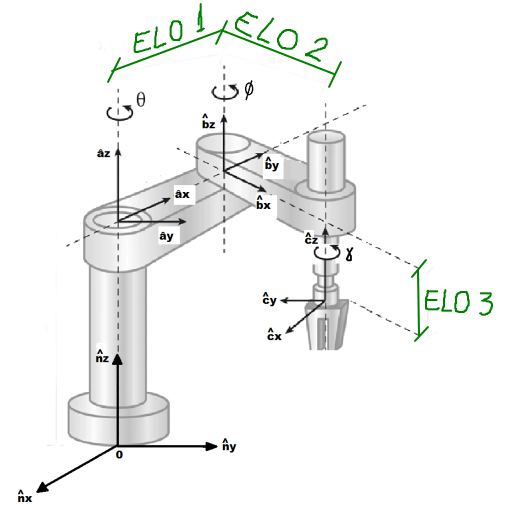

##### Definindo tensores de inércia e corpos rígidos dos elos do robô:

In [29]:
m1,I1xx,I1yy,I1zz = sy.symbols('m I_1xx I_1yy I_1zz')
m2,I2xx,I2yy,I2zz = sy.symbols('m I_2xx I_2yy I_2zz')
m3,I3xx,I3yy,I3zz = sy.symbols('m I_3xx I_3yy I_3zz')

In [30]:
Ielo1 = ps.inertia(A,I1xx,I1yy,I1zz)
Elo1 = ps.RigidBody('Elo_1',CM1,A,m1,(Ielo1,CM1))

In [31]:
Ielo2 = ps.inertia(B,I2xx,I2yy,I2zz)
Elo2 = ps.RigidBody('Elo_2',CM2,B,m2,(Ielo2,CM2))

In [32]:
Ielo3 = ps.inertia(C,I3xx,I3yy,I3zz)
Elo3 = ps.RigidBody('Elo_3',CM3,C,m3,(Ielo3,CM3))

##### Forças atuantes no sistema:

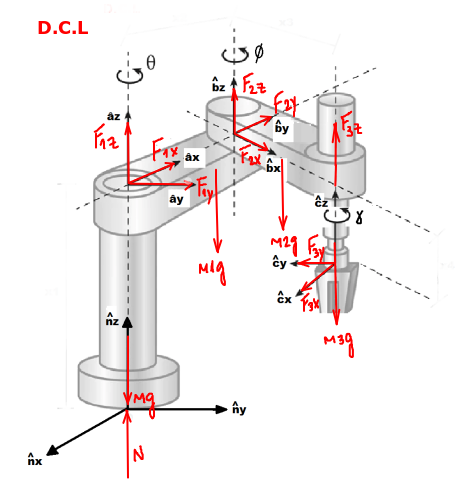

In [33]:
T1,T2,T3 = sy.symbols('T_1 T_2 T_3')
g,F1x,F1y,F1z,F2x,F2y,F2z,F3z = sy.symbols('g F_1x F_1y F_1z F_2x F_2y F_2z F_3z')

##### Força resultante do elo 1:

In [34]:
R1 = -m1*g*N.z + F1x*A.x + F1y*A.y + F1z*A.z + F2x*B.x + F2y*B.y + F2z*B.z
R1

- g*m*N.z + F_1x*A.x + F_1y*A.y + F_1z*A.z + F_2x*B.x + F_2y*B.y + F_2z*B.z

##### Momentos atuando no elo 1:

In [35]:
M1 = T1*N.z + O1.pos_from(CM1).cross(F1x*A.x + F1y*A.y + F1z*A.z) - T2*B.z + O2.pos_from(CM2).cross(F2x*B.x + F2y*B.y + F2z*B.z)
M1

T_1*N.z + F_1z*x2/2*A.y - F_1y*x2/2*A.z + F_2z*x3/2*B.y + (-F_2y*x3/2 - T_2)*B.z

##### Força resultante do elo 2:

In [36]:
R2 = -m2*g*N.z - F2x*B.x - F2y*B.y - F2z*B.z + F3z*C.z
R2

- g*m*N.z - F_2x*B.x - F_2y*B.y - F_2z*B.z + F_3z*C.z

##### Momentos atuando no elo 2:

In [37]:
M2 = T2*B.z + O2.pos_from(CM2).cross(-F2x*B.x - F2y*B.y - F2z*B.z) - T3*C.z + O3.pos_from(CM3).cross(F3z*C.z)
M2

- F_2z*x3/2*B.y + (F_2y*x3/2 + T_2)*B.z - T_3*C.z

##### Força resultante do elo 3:


In [38]:
R3 = -m3*g*N.z - F3z*C.z
R3

- g*m*N.z - F_3z*C.z

##### Momentos atuando no elo 3:

In [39]:
M3 = T3*C.z + O3.pos_from(CM3).cross(-F3z*C.z)
M3

T_3*C.z

##### Quantidade de movimento linear dos elos:

In [40]:
G1 = Elo1.linear_momentum(N)
G1

m*x2*theta'/2*A.y

In [41]:
G2 = Elo2.linear_momentum(N)
G2

m*x2*theta'*A.y + m*x3*(phi' + theta')/2*B.y

In [42]:
G3 = Elo3.linear_momentum(N)
G3

m*x2*theta'*A.y + m*x3*(phi' + theta')*B.y - m*x4'/2*C.z

##### Quantidade de movimento angular dos elos:


In [43]:
H1 = Elo1.angular_momentum(CM1,N)
H1

I_1zz*theta'*A.z

In [44]:
H2 = Elo2.angular_momentum(CM2,N)
H2

I_2zz*(phi' + theta')*B.z

In [45]:
H3 = Elo3.angular_momentum(CM3,N)
H3

I_3zz*(gamma' + phi' + theta')*C.z

##### Equações de movimento (Método de Newton):

In [46]:
EqMov1_l = (G1.dt(N)-R1).express(A)
EqMov1_l

(-F_1x - F_2x*cos(phi) + F_2y*sin(phi) - m*x2*theta'**2/2)*A.x + (-F_1y - F_2x*sin(phi) - F_2y*cos(phi) + m*x2*theta''/2)*A.y + (-F_1z - F_2z + g*m)*A.z

In [47]:
EqMov2_l = (G2.dt(N)-R2).express(B)
EqMov2_l

(F_2x + m*x2*sin(phi)*theta'' - m*x2*cos(phi)*theta'**2 - m*x3*(phi' + theta')**2/2)*B.x + (F_2y + m*x2*sin(phi)*theta'**2 + m*x2*cos(phi)*theta'' + m*x3*(phi'' + theta'')/2)*B.y + (F_2z - F_3z + g*m)*B.z

In [48]:
EqMov3_l = (G3.dt(N)-R3).express(C)
EqMov3_l

(-m*x2*(-sin(gamma)*sin(phi) + cos(gamma)*cos(phi))*theta'**2 + m*x2*(sin(gamma)*cos(phi) + sin(phi)*cos(gamma))*theta'' - m*x3*(phi' + theta')**2*cos(gamma) + m*x3*(phi'' + theta'')*sin(gamma))*C.x + (m*x2*(-sin(gamma)*sin(phi) + cos(gamma)*cos(phi))*theta'' - m*x2*(-sin(gamma)*cos(phi) - sin(phi)*cos(gamma))*theta'**2 + m*x3*(phi' + theta')**2*sin(gamma) + m*x3*(phi'' + theta'')*cos(gamma))*C.y + (F_3z + g*m - m*x4''/2)*C.z

##### Equação de movimento (Método de Euler):

In [49]:
EqMov1_a = (H1.dt(N)-M1).express(A)
EqMov1_a

F_2z*x3*sin(phi)/2*A.x + (-F_1z*x2/2 - F_2z*x3*cos(phi)/2)*A.y + (F_1y*x2/2 + F_2y*x3/2 + I_1zz*theta'' - T_1 + T_2)*A.z

In [50]:
EqMov2_a = (H2.dt(N)-M2).express(B)
EqMov2_a

F_2z*x3/2*B.y + (-F_2y*x3/2 + I_2zz*(phi'' + theta'') - T_2 + T_3)*B.z

In [51]:
EqMov3_a = (H3.dt(N)-M3).express(C)
EqMov3_a

(I_3zz*(gamma'' + phi'' + theta'') - T_3)*C.z

### Equações de movimento do Elo 1:

##### Matriz com as equações de movimento linear em x,y e z:

In [52]:
sy.Matrix([EqMov1_l.args[0][0][0],EqMov1_l.args[0][0][1],EqMov1_l.args[0][0][2]])

Matrix([
[  -F_1x - F_2x*cos(phi(t)) + F_2y*sin(phi(t)) - m*x2*Derivative(theta(t), t)**2/2],
[-F_1y - F_2x*sin(phi(t)) - F_2y*cos(phi(t)) + m*x2*Derivative(theta(t), (t, 2))/2],
[                                                               -F_1z - F_2z + g*m]])

##### Matriz com as equações de movimento angular em x,y e z:

In [53]:
sy.Matrix([EqMov1_a.args[0][0][0],EqMov1_a.args[0][0][1],EqMov1_a.args[0][0][2]])

Matrix([
[                                                 F_2z*x3*sin(phi(t))/2],
[                                    -F_1z*x2/2 - F_2z*x3*cos(phi(t))/2],
[F_1y*x2/2 + F_2y*x3/2 + I_1zz*Derivative(theta(t), (t, 2)) - T_1 + T_2]])

### Equações de movimento do Elo 2:

##### Matriz com as equações de movimento linear em x,y e z:

In [54]:
sy.Matrix([EqMov2_l.args[0][0][0],EqMov2_l.args[0][0][1],EqMov2_l.args[0][0][2]])

Matrix([
[       F_2x + m*x2*sin(phi(t))*Derivative(theta(t), (t, 2)) - m*x2*cos(phi(t))*Derivative(theta(t), t)**2 - m*x3*(Derivative(phi(t), t) + Derivative(theta(t), t))**2/2],
[F_2y + m*x2*sin(phi(t))*Derivative(theta(t), t)**2 + m*x2*cos(phi(t))*Derivative(theta(t), (t, 2)) + m*x3*(Derivative(phi(t), (t, 2)) + Derivative(theta(t), (t, 2)))/2],
[                                                                                                                                                      F_2z - F_3z + g*m]])

##### Matriz com as equações de movimento angular em x,y e z:

In [55]:
sy.Matrix([EqMov2_a.args[0][0][0],EqMov2_a.args[0][0][1],EqMov2_a.args[0][0][2]])

Matrix([
[                                                                                         0],
[                                                                                 F_2z*x3/2],
[-F_2y*x3/2 + I_2zz*(Derivative(phi(t), (t, 2)) + Derivative(theta(t), (t, 2))) - T_2 + T_3]])

### Equações de movimento do Elo 3:

##### Matriz com as equações de movimento linear em x,y e z:

In [56]:
sy.Matrix([EqMov3_l.args[0][0][0],EqMov3_l.args[0][0][1],EqMov3_l.args[0][0][2]])

Matrix([
[-m*x2*(-sin(gamma(t))*sin(phi(t)) + cos(gamma(t))*cos(phi(t)))*Derivative(theta(t), t)**2 + m*x2*(sin(gamma(t))*cos(phi(t)) + sin(phi(t))*cos(gamma(t)))*Derivative(theta(t), (t, 2)) - m*x3*(Derivative(phi(t), t) + Derivative(theta(t), t))**2*cos(gamma(t)) + m*x3*(Derivative(phi(t), (t, 2)) + Derivative(theta(t), (t, 2)))*sin(gamma(t))],
[m*x2*(-sin(gamma(t))*sin(phi(t)) + cos(gamma(t))*cos(phi(t)))*Derivative(theta(t), (t, 2)) - m*x2*(-sin(gamma(t))*cos(phi(t)) - sin(phi(t))*cos(gamma(t)))*Derivative(theta(t), t)**2 + m*x3*(Derivative(phi(t), t) + Derivative(theta(t), t))**2*sin(gamma(t)) + m*x3*(Derivative(phi(t), (t, 2)) + Derivative(theta(t), (t, 2)))*cos(gamma(t))],
[                                                                                                                                                                                                                                                                                                      F_3z + g*m - m*D

##### Matriz com as equações de movimento angular em x,y e z:

In [57]:
sy.Matrix([EqMov3_a.args[0][0][0],EqMov3_a.args[0][0][1],EqMov3_a.args[0][0][2]])

Matrix([
[                                                                                                     0],
[                                                                                                     0],
[I_3zz*(Derivative(gamma(t), (t, 2)) + Derivative(phi(t), (t, 2)) + Derivative(theta(t), (t, 2))) - T_3]])